# Multi Layer Perceptron - Fashion MNIST

We will be starting with a classification exercise. And using the **Fashion Mnist** dataset to do so. It involves identifying the 10 types of products that are there in the image.

- Train: 60,000 images
- Test: 10,000 images
- Class: 10
- Labels: 
 - 0: T-shirt/top
 - 1: Trouser
 - 2: Pullover
 - 3: Dress
 - 4: Coat
 - 5: Sandal
 - 6: Shirt
 - 7: Sneaker
 - 8: Bag
 - 9: Ankle boot

### Get Input and Output

In [59]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
%matplotlib inline
import vis

In [58]:
from keras.datasets import fashion_mnist

In [9]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [10]:
labels = fashion_mnist_label()
labels

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

#### See an Image

In [11]:
import vis

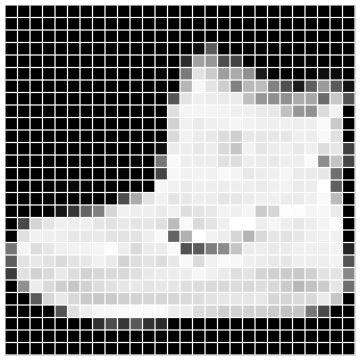

In [12]:
vis.imshow(x_train[0])

#### See an Image from each class

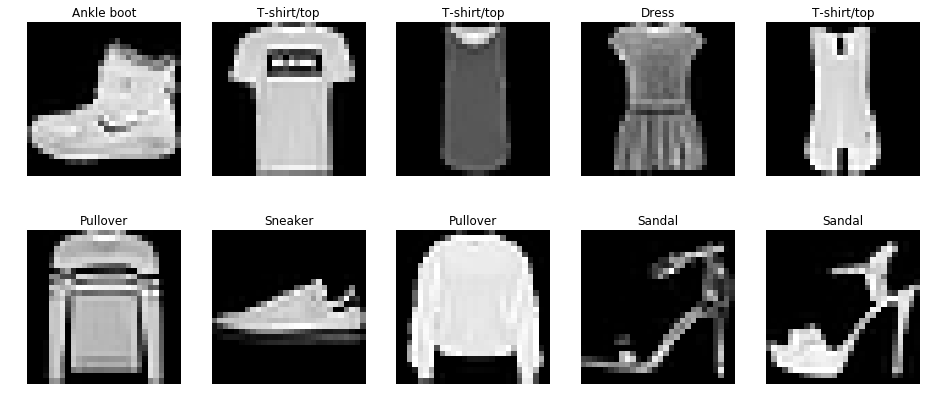

In [13]:
vis.imshow_unique(x_train, y_train, labels)

#### See 500 of the Images

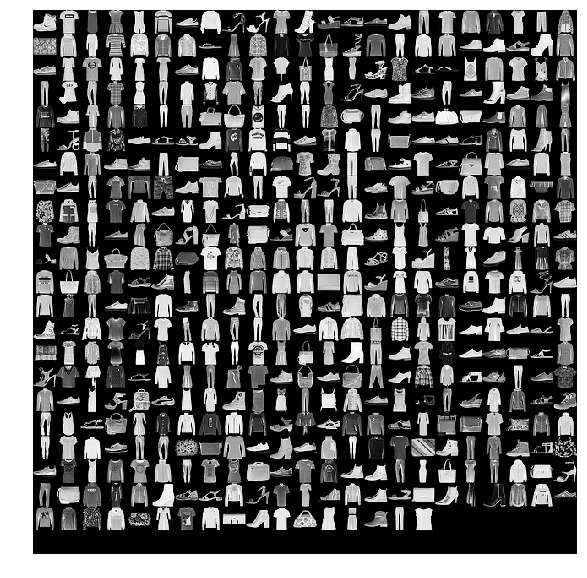

In [14]:
vis.imshow_sprite(x_train[:500])

## Multi Layer Perceptron

![](img/single_dl.png)

Lets learn both the representation and the classifier together now

**Step 1: Prepare the images and labels**

Convert from 'uint8' to 'float32' and normalise the data to (0,1) 

In [15]:
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

Flatten the data from (60000, 28, 28) to (60000, 784)

In [16]:
x_train_flatten = x_train.reshape(60000, 28 * 28)
x_test_flatten = x_test.reshape(10000, 28 * 28)

Convert class vectors to binary class matrices

In [17]:
from keras.utils import to_categorical
y_train_class = to_categorical(y_train, 10)
y_test_class = to_categorical(y_test, 10)

**Step 2: Craft the feature transfomation and classifier model **

In [18]:
from keras import Sequential
from keras.layers import Dense, Activation

In [19]:
model_mlp = Sequential()
model_mlp.add(Dense(100, activation='relu', input_shape=(28 * 28,)))
model_mlp.add(Dense(50, activation='relu'))
model_mlp.add(Dense(10, activation='softmax'))

In [20]:
model_mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


**Step 3: Compile and fit the model**

In [21]:
model_mlp.compile(loss='categorical_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [22]:
%%time 
mlp_output = model_mlp.fit(x_train_flatten, y_train_class, epochs=10, verbose=0,
                    validation_data=(x_test_flatten, y_test_class))

CPU times: user 1min 22s, sys: 8.76 s, total: 1min 30s
Wall time: 56.5 s


**Step 4: Check the performance of the model**

In [23]:
mlp_metrics = mlp_output.history

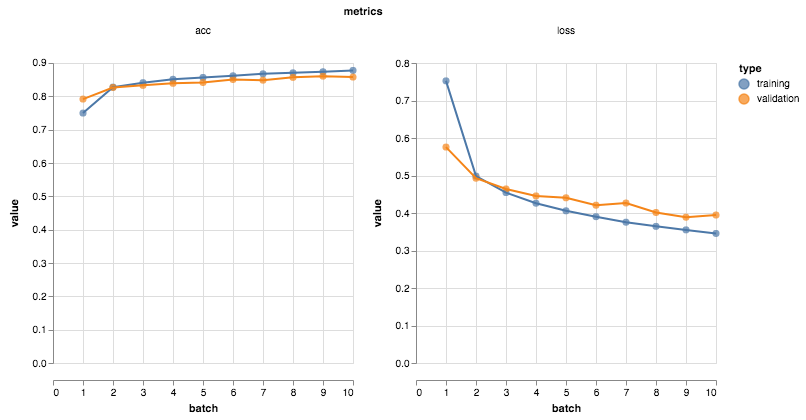

In [24]:
vis.metrics(mlp_metrics)

In [25]:
score = model_mlp.evaluate(x_test_flatten, y_test_class, verbose=1)

10000/10000 [==============================] - 1s 52us/step


In [26]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.394568652487
Test accuracy: 0.8577


**Step 5: Make & Visualise the Prediction**

In [27]:
predict_classes = model_mlp.predict_classes(x_test_flatten)

In [28]:
pd.crosstab(y_test, predict_classes)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,834,1,8,32,4,2,112,0,7,0
1,4,964,0,25,3,0,4,0,0,0
2,21,2,701,8,104,1,161,0,2,0
3,36,13,5,864,37,0,39,0,6,0
4,0,0,91,31,736,1,139,0,2,0
5,0,0,0,1,0,961,0,20,1,17
6,151,1,59,27,55,1,697,0,9,0
7,0,0,0,0,0,41,0,930,0,29
8,3,1,7,9,5,4,24,5,942,0


In [33]:
proba = model_mlp.predict_proba(x_test_flatten)

In [55]:
i = 4

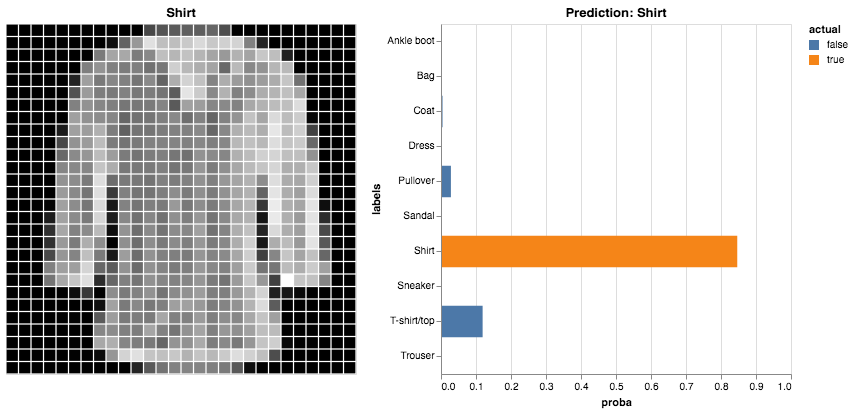

In [56]:
vis.imshow(x_test[i], labels[y_test[i]]) | vis.predict(proba[i], y_test[i], labels)